# Hypothesis Testing with Insurance Data (Core)

For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?


For each question, make sure to:

State your Null Hypothesis and Alternative Hypothesis
Select the correct test according to the data type and number of samples
Test the assumptions of your selected test.
Execute the selected test, or the alternative test (if you do not meet the assumptions)
Interpret your p-value and reject or fail to reject your null hypothesis 
Show a supporting visualization that helps display the result

# question 1

- (Null Hypothesis): smokers do not have higher insurance charges than non-smokers.

- (Alternative Hypothesis): smokers have higher insurance charges than non-smokers.

this is numerical data with 2 groups so it is going to be 2 sample T-test

For numeric data, the assumptions are :


- No significant outliers
- Normally distributed groups
- Equal Variance between groups


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [75]:
df = pd.read_csv('insurance - insurance (1).csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# see how many with and without strength
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [4]:
df['smoker'].head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

there are 1064 non smokers whereas there are 274 smokers

Split data into two groups

In [34]:
# Filtering out those with and without super strength
non_smokerdf= df.loc[df['smoker']== 'no']
smokerdf = df.loc[df['smoker']== 'yes']

In [35]:
non_smokerdf.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [36]:
non_smokercharges=non_smokerdf['charges']
smokercharges=smokerdf['charges']

<Axes: xlabel='smoker', ylabel='charges'>

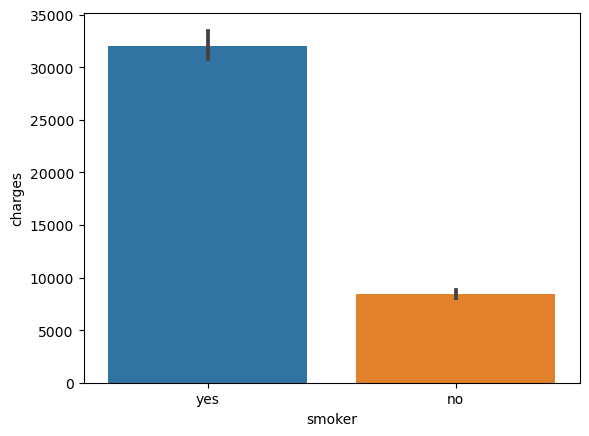

In [37]:
sns.barplot(data=df, x='smoker', y='charges')

### Check for and remove outliers

We will check each group separately for outliers.

In [38]:
# Check for outliers in non smokercharges for nonsmoker group
zscores= stats.zscore(non_smokercharges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [39]:
zscores= stats.zscore(smokercharges)
outliers = abs(zscores)>3
np.sum(outliers)

0

We will remove outliers from the non smokercharges group

In [41]:
# remove outliers from non smokercharges group
non_smokercharges = non_smokercharges[(np.abs(stats.zscore(non_smokercharges)) < 3)]

In [42]:
#Check for Normality

In [45]:
# test the non smoker charges group for normality
result_nonsmokercharges = stats.normaltest(non_smokercharges)
result_nonsmokercharges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [46]:
result_smokercharges = stats.normaltest(smokercharges)
result_smokercharges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

the results are well below 0.05, which means our data is NOT normally distributed.However, our sample size is large enough to proceed without satisfying this test.  For sample T-test, sample sizes of 15 per group are considered sufficient.

In [15]:
#Check for Equal Variance

In [47]:
result = stats.levene(smokercharges, non_smokercharges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Looks like we don't have equal variances, but we will include "equal_var = false"

In [18]:
# Independent 2t-test with equal_var set to False
result = stats.ttest_ind(smokercharges, non_smokercharges, equal_var = False)
result

Ttest_indResult(statistic=-33.732305987092516, pvalue=2.575322662587431e-104)

In here, it can be shown that pvalue is less than 0.05 so  we reject the null hypothesis and accept that there is a significant difference between the charges of the smokers vs the charges of non_smokers. 

# question no 2

### Q2. Are men more likely to smoke than women?

(Null Hypothesis): men do not smoke more than women

(Alternative Hypothesis): men are more likely to smoke than women.

this is categorical data with 2 groups so it is going to be a chi-square test

For categorical data, the assumptions are :

The outcome is binary (male smoker or female smoker)
The trials/observations are independent.

In [33]:
smokerdf.head(2)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [19]:
# see how many females and males there are
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [48]:
female_smoker=smokerdf.loc[smokerdf['sex']=='female']
female_smoker.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251


In [49]:
male_smoker=smokerdf.loc[smokerdf['sex']=='male']

In [ ]:
smokerdf['']

<Axes: xlabel='sex', ylabel='Count'>

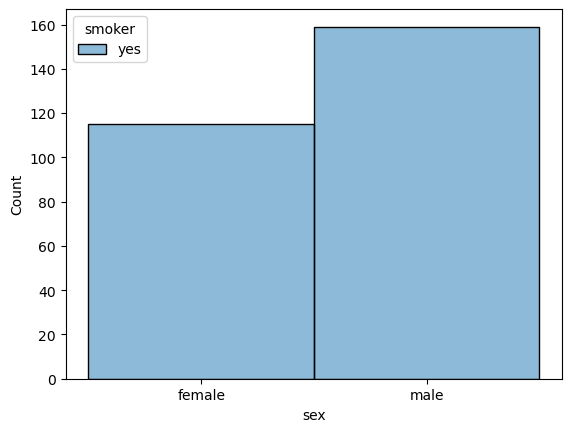

In [61]:
sns.histplot(binwidth=1,
            x='sex',
            hue='smoker',
            data=smokerdf,
            stat="count")

In [66]:
## Save outcomes of 16 heads (success) and 4 tails (failure)
outcomes = [676,662]
p_value = stats.binom_test(outcomes,p=0.5)  # p is expected probability of success (heads)
p_value

C:\Users\awot1\AppData\Local\Temp\ipykernel_14864\1156282397.py:3: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(outcomes,p=0.5)  # p is expected probability of success (heads)


0.7223057572173988

since p>0.5, we fail to reject the null hypothesis, saying that there is no significant difference between male and female smokers.

In [67]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(smokerdf['sex'], smokerdf['smoker'])
table

smoker,yes
sex,
female,115
male,159


In [68]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [69]:
# What was our p-value?
print(p)
p<.05

1.0


False

this shows that there is no significant difference

we fail to reject the null hypothesis, saying that there is no significant difference between male and female smokers.

# question 3

### Q3. Do different regions have different charges, on average?

(Null Hypothesis): different regions do not have different charges on average.

(Alternative Hypothesis): different regions have different charges on average.

this is numerical data with more than two samples (since we are comparing different regions), it is going to be ANOVA and/or Tukey test.
For numeric data, the assumptions are :

No significant outliers
Normally distributed groups
Equal Variance between groups

In [73]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
12,23,male,34.4,0,no,southwest,1826.843
15,19,male,24.6,1,no,southwest,1837.237
18,56,male,40.3,0,no,southwest,10602.385
19,30,male,35.3,0,yes,southwest,36837.467


In [76]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [77]:
df_southwest=df.loc[df['region']=='southwest']

In [82]:
df_southwest['region'].unique()

array(['southwest'], dtype=object)

In [84]:
df_southeast=df.loc[df['region']=='southeast']

In [85]:
df_northwest=df.loc[df['region']=='northwest']

In [86]:
df_northeast=df.loc[df['region']=='northeast']

In [87]:
df_northeast.head()

,age,sex,bmi,children,smoker,region,charges
8,37,male,29.830,2,no,northeast,6406.41070
10,25,male,26.220,0,no,northeast,2721.32080
16,52,female,30.780,1,no,northeast,10797.33620
17,23,male,23.845,0,no,northeast,2395.17155
20,60,female,36.005,0,no,northeast,13228.84695


<Axes: xlabel='region', ylabel='charges'>

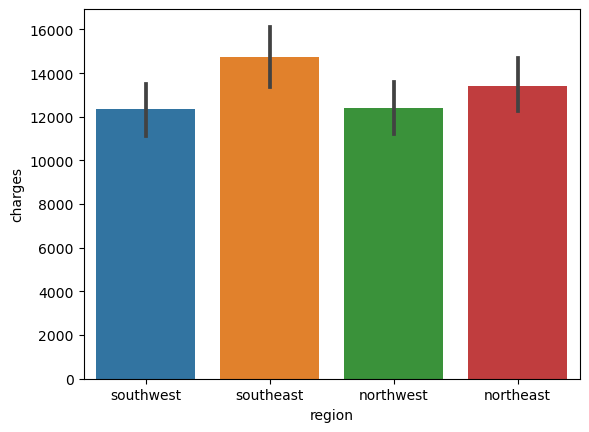

In [89]:
sns.barplot(data=df,x='region',y='charges')

In [99]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

# Testing Assumptions

In [ ]:
#Assumption of Normality

In [100]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df



,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [101]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


this means that p does not have equal distribution.

# Testing Assumption of Equal Variance

In [103]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

we do not meet the assumptions of equal variance since p<.05

# One-Way ANOVA Test

In [105]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

it can be seen from this test that, p<.05 which means , there is significant difference between the groups so we reject the null hypothesis since there are differences in charges between different regions.